### Importing Libraries

In [1]:
import cv2,time
import pandas
from datetime import datetime

### Assigning Intial Values

In [2]:
first_frame=None
status_list=[None,None]
times=[]

df=pandas.DataFrame(columns=["Start","End"])


### Starts Video Capturing

In [3]:
video=cv2.VideoCapture(0)

### Combining Frames on Every moment

In [4]:
while True:
    
    check,frame=video.read()
    status=0
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    gray=cv2.GaussianBlur(gray,(21,21),0)
    
    if first_frame is None:
        first_frame=gray
        continue
        
    delta_frame=cv2.absdiff(first_frame,gray)
    thresh_delta=cv2.threshold(delta_frame,30,255,cv2.THRESH_BINARY)[1]
    
    thresh_delta=cv2.dilate(thresh_delta,None,iterations=0)
    (_,cnts,_)=cv2.findContours(thresh_delta.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in cnts:
        if cv2.contourArea(contour)<1000:
            continue
        status=1
        (x,y,w,h)=cv2.boundingRect(contour)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
        
    status_list.append(status)
    status_list=status_list[-2:]
    
    if status_list[-1]==1 and status_list[-2]==0:
        times.append(datetime.now())
        
    if status_list[-1]==0 and status_list[-2]==1:
        times.append(datetime.now())
        
    cv2.imshow("Frame",frame)
    cv2.imshow("Capturing",gray)
    cv2.imshow('Delta',delta_frame)
    cv2.imshow("Thresh",thresh_delta)
    
    
    
    key=cv2.waitKey(1)
    
    if key==ord('q'):
        break

### Saving all the contents to Times.csv file

In [5]:
for i in range (0,len(times)-1,2):
    df=df.append({"Start":times[i],"End":times[i+1]},ignore_index=True)
    
df.to_csv("Times.csv")


### Ending Video

In [6]:
video.release()
cv2.destroyAllWindows

<function destroyAllWindows>

### Plotting the moment with Time

Text(0, 0.5, 'Time in sec')

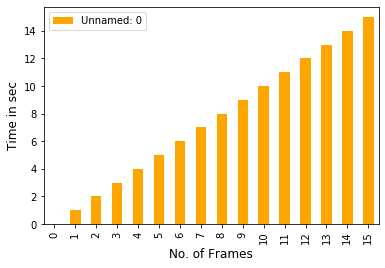

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
file=pd.read_csv("Times.csv")
file.plot.bar(color='orange',label="train_score")
plt.xlabel('No. of Frames',fontsize=12)
plt.ylabel('Time in sec',fontsize=12)